# Introducción






El paquete de navegación Navigation2 incluye un servidor de acciones llamado **FollowWaypoints** que nos va a permitir lanzarle al robot varios puntos de navegación para que siga una ruta pre-establecida.

Este servidor acepta mensajes tipo Followwaypoint, que será un array de puntos, cada uno de los cuales es uno de los destinos.

Este servidor utiliza el servidor de acciones NavigateToPose de manera que le va mandado los diferentes destinos, uno detrás de otro, conforme va llegando a cada uno de ellos.

Una vez llega al destino permite realizar tres acciones:

1- Esperar un tiempo determinado (en milisegundos)

2- Tomar una foto

3- Esperar a una orden externa


Para configurar este servidor deberemos añadir las siguientes lineas en el fichero de configuración (my_nav2_params.yaml) de nuestro sistema de navegación.


In [ ]:
waypoint_follower:
  ros__parameters:
    loop_rate: 20
    stop_on_failure: false
    waypoint_task_executor_plugin: "wait_at_waypoint"
    wait_at_waypoint:
      plugin: "nav2_waypoint_follower::WaitAtWaypoint"
      enabled: True
      waypoint_pause_duration: 0

# Demo funcionamiento del **waypoint_follower**

Antes de empezar a crear nuestro propio script podemos hacer una demo para ver cómo funciona esta acción.



In [ ]:
#[Terminal 1]
export GAZEBO_MODEL_PATH=$HOME/turtlebot3_ws/src/turtlebot3_simulations/turtlebot3_gazebo/models
ros2 launch nav2_bringup tb3_simulation_launch.py

Se abrirá Gazebo con el nuestro mundo, y el visualizador RVIZ. 

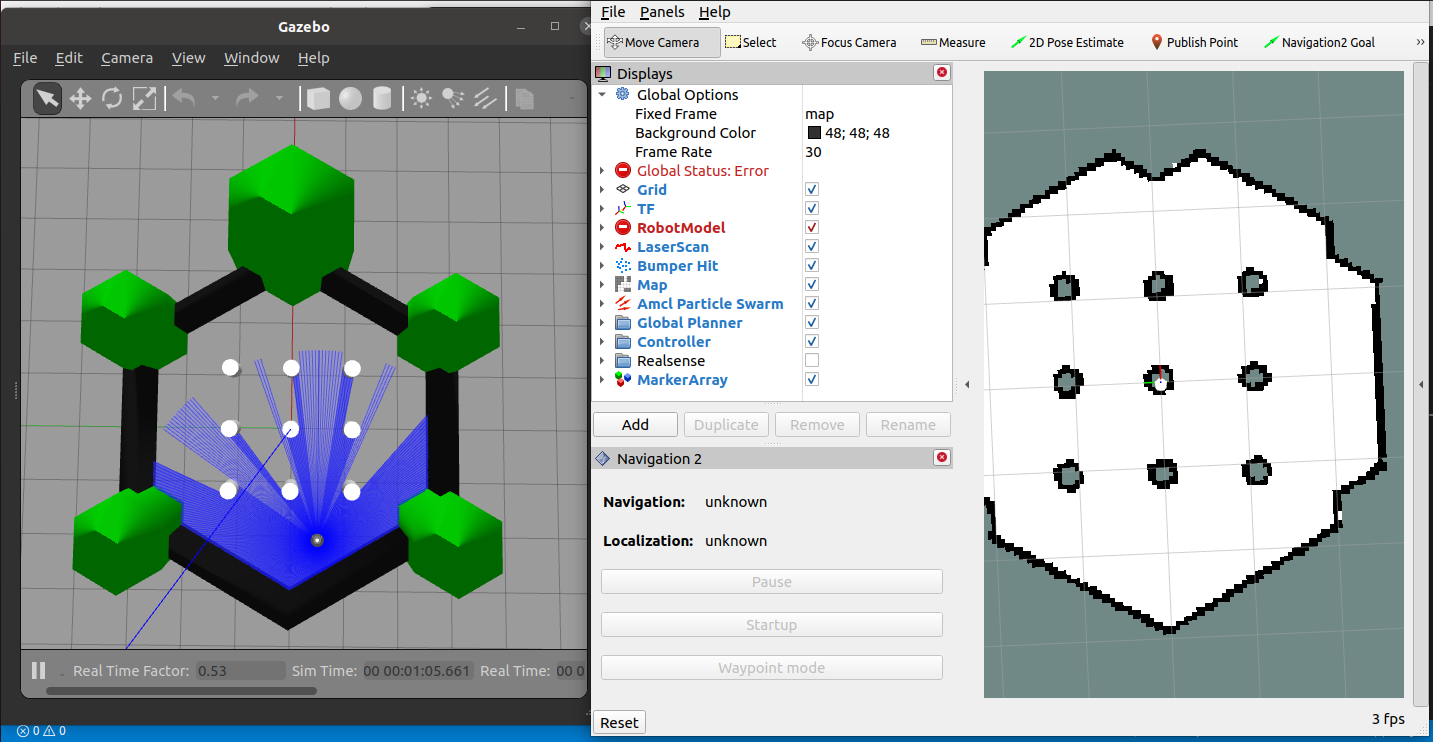

Proporcionarle al sistema la posición inicial del Robot, utilizando el menú 2D Pose Estimate del RVIZ.

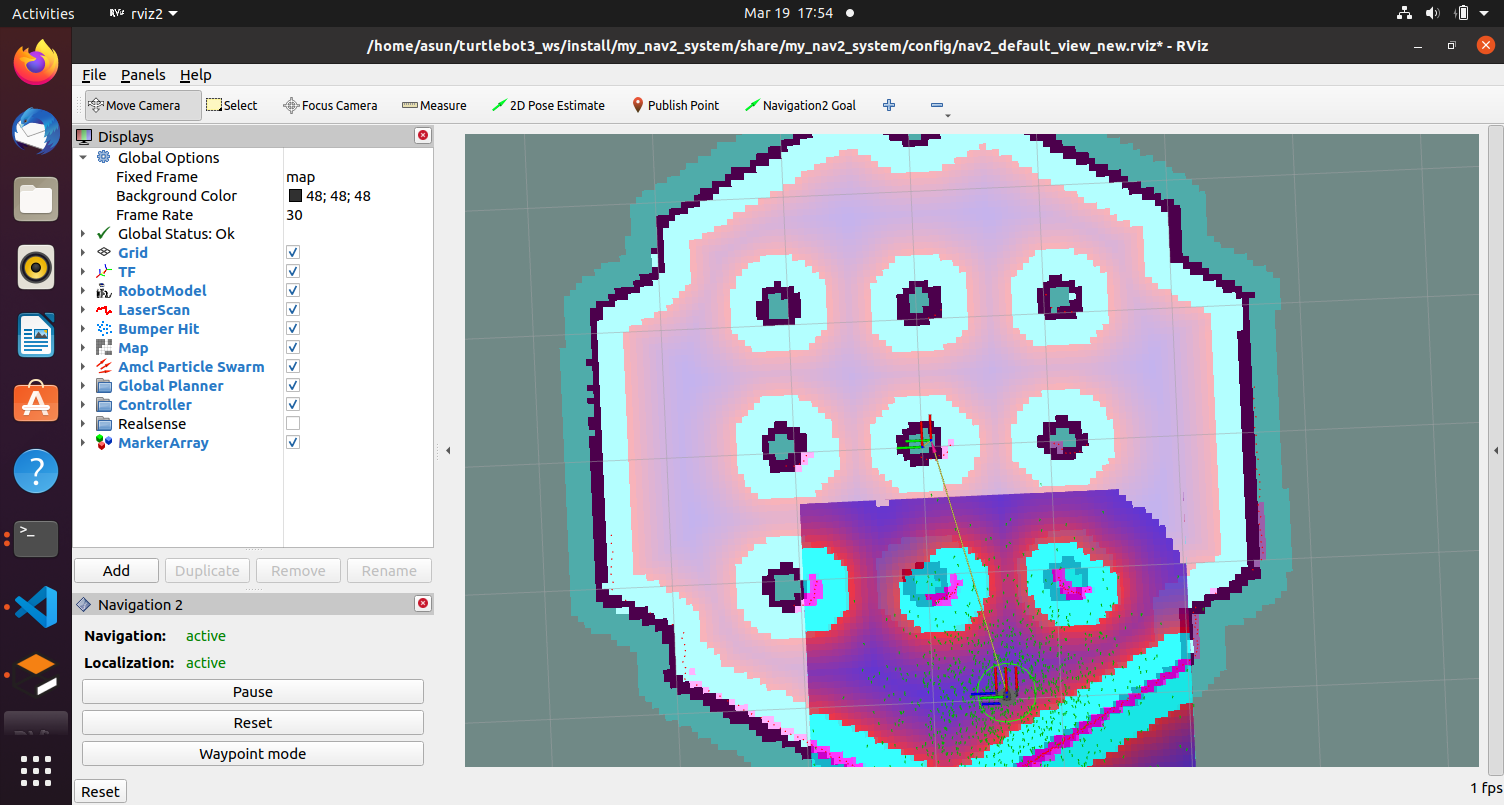

En el visualizador RVIZ: usar el menú de Navigation 2 (situado debajo de los displays) para activar el modo **Waypoint mode**. Seleccionar **Navigation2 Goal** y pulsar en un punto del mapa. Hacer esto varias veces para darle varios destinos. 

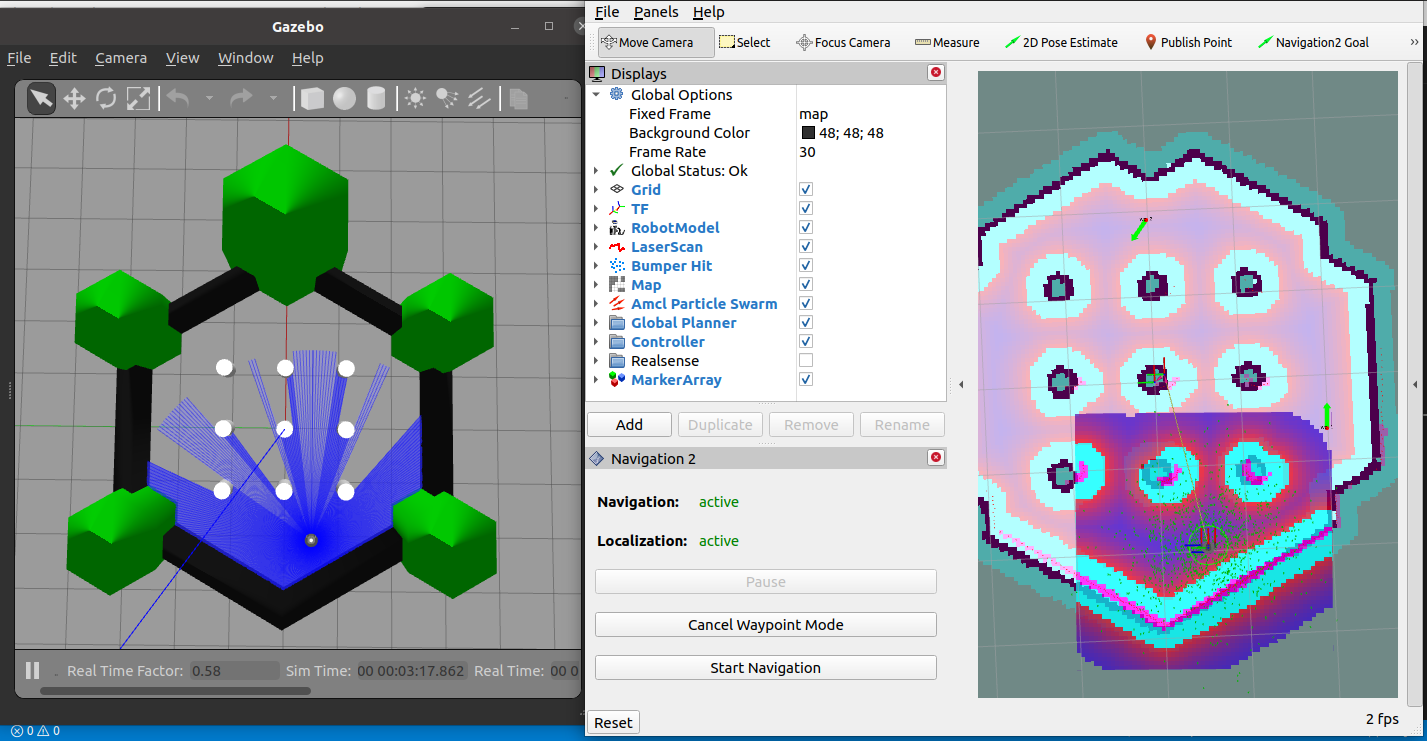

Pulsar Start Navigation del menú Navigation2. Tras ello el robot comenzará a navegar.

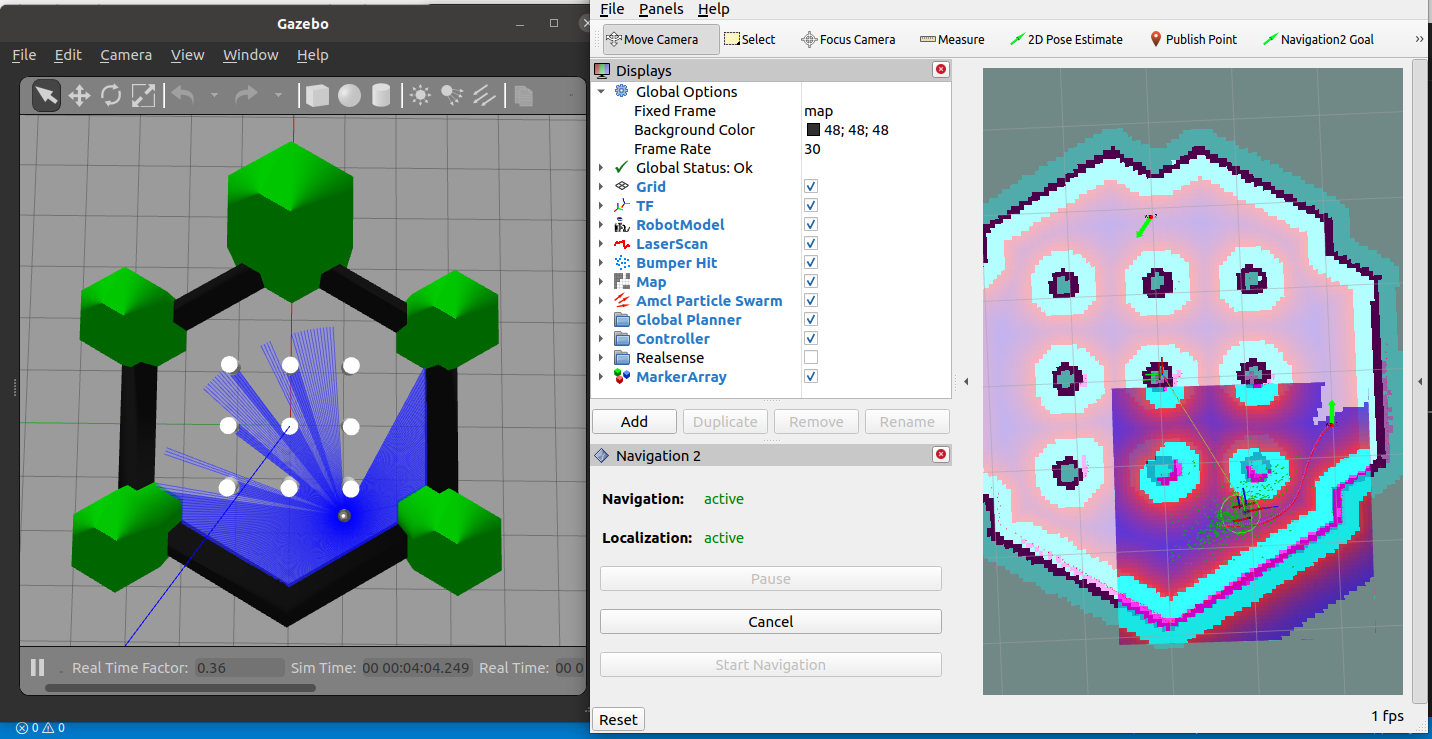

# Creando el Script para recorrer una Ruta

1- Utilizamos el paquete de navegación creado en el colab ROS2_Nav01 **my_nav2_system**. Haremos una copia del fichero de lanzamiento **my_nav2_system.launch.py** y la llamremos **my_nav2_waypoints_follower.launch.py**. En este fichero de lanzamiento incluimos el nodo waypoint_follower. Para ello, habrá que añadir el siguiente código:




In [ ]:
        Node(
            package='nav2_waypoint_follower',
            executable='waypoint_follower',
            name='waypoint_follower',
            output='screen',
            parameters=[nav2_yaml, {'use_sim_time': True}]
        ),

Recordad que tendremos que añadir este nodo en la lista de nodos que controla el lifecycle_manager, de manera que debería aparecer así:

In [ ]:
Node(
            package='nav2_lifecycle_manager',
            executable='lifecycle_manager',
            name='lifecycle_manager_pathplanner',
            output='screen',
            parameters=[{'use_sim_time': True},
                        {'autostart': True},
                        {'node_names':['map_server', 'amcl', 'planner_server', 'controller_server', 'recoveries_server', 'bt_navigator', 'waypoint_follower']}]
        ),

2- Añadimos los parámetros de configuración del nodo waypoint_follower al fichero **my_nav2_params.yaml**.

In [ ]:
waypoint_follower:
  ros__parameters:
    loop_rate: 20
    stop_on_failure: false
    waypoint_task_executor_plugin: "wait_at_waypoint"
    wait_at_waypoint:
      plugin: "nav2_waypoint_follower::WaitAtWaypoint"
      enabled: True
      waypoint_pause_duration: 200


3- Averiguar cómo son los mensajes tipo **FollowWaypoints** ( [ver web](https://github.com/ros-planning/navigation2/tree/main/nav2_msgs)) y realizar un script, **my_waypoint_follower.py**, que:

*   Implemente un nodo que contenga un cliente de la acción **follow_waypoints**

*   La clase deberá contener un método que defina una lista de puntos a recorrer por el robot

*   La clase deberá contener un método que envíe la lista de puntos al servidor de la acción

4- Recordad que tenéis que modificar el setup.py para incluir el ejecutable del nuevo script.

5- Compilar 

6- Simular lanzando el fichero de lanzamiento en un terminal. Al abrirse el RVIZ deberemos darle la posición inicial al robot (publicando en el topic **/initial_pose** o utilizando el menú 2D Pose Estimate de RVIZ)

7- Lanzar el script **my_waypoint_follower.py**